In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json

In [25]:
def read_json_to_pd(output_json_file):
#     print(output_json_file)
    with open(output_json_file,"r") as json_file:
        exps=json.load(json_file)
    
    data = []

    for entry in exps:
        row={}
        for k,v in entry["parameters"].items():
            row[k]=v
        row.update(entry['results'])
        data.append(row)

    df = pd.DataFrame(data)
    return df

In [28]:
folder_to_analyze="TTA_on_corrupted/02_training_native/modelep7/"

In [29]:
dfs=[]
for filename in os.listdir(folder_to_analyze):
    if filename.endswith("json"):
        df =read_json_to_pd(folder_to_analyze+filename)
        dfs.append(df)

In [30]:
methods=["DELTA","LAME","TENT","NOT_ADAPTED","SAR"]
def aggregate_batches(df,number_of_iterations):
    average_results=pd.DataFrame(df)
    for method in methods:
        average_results[f"{method}_cumulative_accuracy"]=list(average_results[[f"{method}_cumulative_accuracy_{i}" for i in range(0,number_of_iterations)]].values)
        average_results[f"{method}_batch_accuracy"]=list(average_results[[f"{method}_batch_accuracy_{i}" for i in range(0,number_of_iterations)]].values)
        average_results[f"{method}_class_accuracy"]=list(average_results[[f"{method}_class_accuracy_{i}" for i in range(0,number_of_iterations)]].values)
    return average_results

In [31]:
all_res=pd.concat(dfs)
all_res_aggregated=aggregate_batches(all_res.groupby(["artifact","model"]).mean(),10).reset_index(1)
# all_res_aggregated_model1=all_res_aggregated[all_res_aggregated.model=="TvN_350_SN_D256_Initial_Ep7_fullmodel.pth"].drop(columns=["seed","model"])
# all_res_aggregated_model2=all_res_aggregated[all_res_aggregated.model=="TvN_350_SN_D256_v2_Ep1_fullmodel.pth"].drop(columns=["seed","model"])
# summary=all_res.groupby(["model","artifact"]).mean().reset_index(1)

In [32]:
colors={"DELTA":"blue","LAME":"red","TENT":"purple","NOT_ADAPTED":"lightgreen","SAR":"black","SAR_TENT":"pink"}

In [31]:

# all_res_mean=aggregate_batches(all_res.groupby(["model"]).mean(),10).reset_index(0)

# all_res_std=aggregate_batches(all_res.groupby(["model"]).std(),10).reset_index(0)

In [32]:
# all_res_mean[all_res_mean.model=="TvN_350_SN_D256_Initial_Ep7_fullmodel.pth"]

In [33]:
# fig,axes=plt.subplots(3,1,figsize=(15,20))
# for i,metric in enumerate(["cumulative","class","batch"]):
#     for method in methods:
        
#         avg_p=all_res_mean[all_res_mean.model=="TvN_350_SN_D256_Initial_Ep7_fullmodel.pth"][f"{method}_{metric}_accuracy"][0]
#         std_p=all_res_std[all_res_std.model=="TvN_350_SN_D256_Initial_Ep7_fullmodel.pth"][f"{method}_{metric}_accuracy"][0]
#         axes[i].plot(avg_p,color=colors[method],label=method)
#         axes[i].fill_between(list(range(10)),avg_p-std_p,avg_p+std_p,alpha=0.3,color=colors[method])
#         axes[i].set_ylabel(metric+" accuracy",fontsize=20)
        
#     axes[i].set_xlabel("iteration",fontsize=20)
# plt.legend(fontsize=20)
# # plt.savefig("model1.png",dpi=300)

In [16]:
# fig,axes=plt.subplots(3,1,figsize=(15,20))
# for i,metric in enumerate(["cumulative","class","batch"]):
#     for method in methods:
        
#         avg_p=all_res_mean[all_res_mean.model=="#!/bin/bash
#SBATCH --job-name=cpath
#SBATCH --output=out_cpath_%a.txt
#SBATCH --error=err_cpath_%a.txt
#SBATCH --ntasks=1
#SBATCH --mem=24Gb
#SBATCH --gres=gpu:rtx8000:1
#SBATCH --partition=long
#SBATCH --time=01:00:00
#SBATCH --array=0-9

module load anaconda/3
source /home/mila/p/paria.mehrbod/.bashrc
conda activate pathology

corruptions=("00_original" "01_focus" "02_jpeg" "04_rotation" "05_flip" "08_bright" "09_contrast" "10_dark_spots" "12_squamous" "13_fat")   

corruption=${corruptions[$SLURM_ARRAY_TASK_ID]}

python 3_Validation_TTA.py --artifact $corruption --cor_path "01_case_western_native/" --model_name "TvN_350_SN_D256_Initial_Ep7_fullmodel.pth".pth"][f"{method}_{metric}_accuracy"][1]
#         std_p=all_res_std[all_res_std.model=="TvN_350_SN_D256_v2_Ep1_fullmodel.pth"][f"{method}_{metric}_accuracy"][1]
#         axes[i].plot(avg_p,color=colors[method],label=method)
#         axes[i].fill_between(list(range(10)),avg_p-std_p,avg_p+std_p,alpha=0.3,color=colors[method])
#         axes[i].set_ylabel(metric+" accuracy",fontsize=20)
        
#     axes[i].set_xlabel("iteration",fontsize=20)
# plt.legend(fontsize=20)
# # plt.savefig("model1.png",dpi=300)

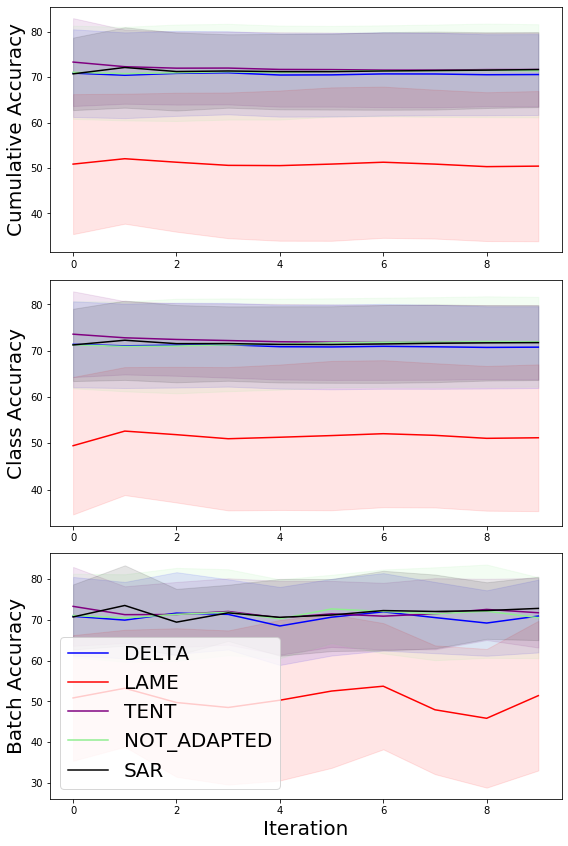

In [34]:
fig,axes=plt.subplots(3,1,figsize=(8,12))
for i,metric in enumerate(["cumulative","class","batch"]):
    for method in methods:
        
        avg_p=all_res_aggregated[f"{method}_{metric}_accuracy"].values.mean()
        std_p=all_res_aggregated[f"{method}_{metric}_accuracy"].values.std()
        axes[i].plot(avg_p,color=colors[method],label=method)
        axes[i].fill_between(list(range(10)),avg_p-std_p,avg_p+std_p,alpha=0.1,color=colors[method])
        axes[i].set_ylabel(metric.title()+" Accuracy",fontsize=20)
        
axes[i].set_xlabel("Iteration",fontsize=20)
plt.legend(fontsize=20,loc="lower left")
plt.tight_layout()
plt.savefig("model1_all.png",dpi=300)

In [35]:
artifacts=["00_original", "01_focus", "02_jpeg", "04_rotation", "05_flip" ,"08_bright", "09_contrast", "10_dark_spots", "12_squamous","13_fat"]

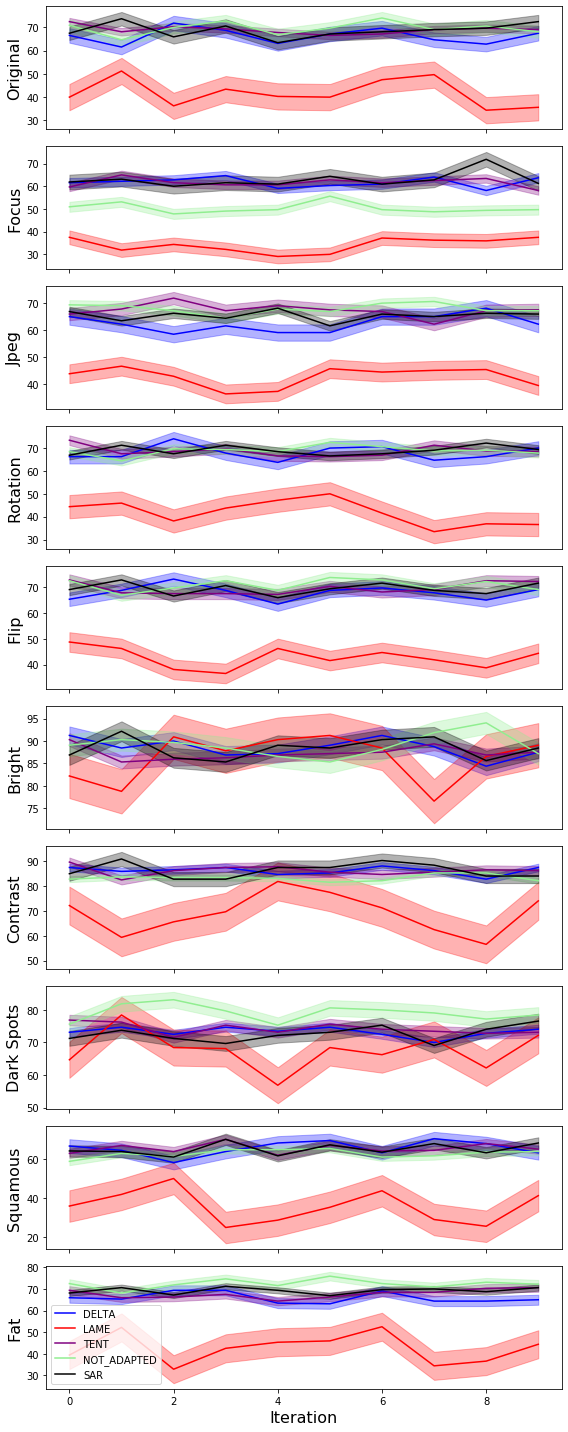

In [36]:
fig,axes=plt.subplots(len(artifacts),1,figsize=(8,20),sharex=True)
for i, artifact in enumerate(artifacts):
#     for i,metric in enumerate(["cumulative","class","batch"]):
    metric="batch"
    for method in methods:
        avg_p=all_res_aggregated[f"{method}_{metric}_accuracy"][artifact]
        std_p=all_res_aggregated[f"{method}_{metric}_accuracy"][artifact].std()
        axes[i].plot(avg_p,color=colors[method],label=method)
        axes[i].fill_between(list(range(10)),avg_p-std_p,avg_p+std_p,alpha=0.3,color=colors[method])
        axes[i].set_ylabel(artifact[3:].replace("_"," ").title(),fontsize=16)
        
axes[i].set_xlabel("Iteration",fontsize=16)
plt.legend()
plt.tight_layout()
plt.savefig("model1_batch_accuracies.png",dpi=300)

In [39]:
df=read_json_to_pd("results_testsar_TTA_01_focus_TvN_350_SN_D256_v2_Ep1_fullmodel.pth.json").drop(columns=["seed","artifact"])

In [42]:
methods=["TENT","SAR","SAR_TENT"]

In [45]:
ag=aggregate_batches(df,10)

In [48]:
avg_p

0    [67.1875, 65.625, 61.979166666666664, 62.89062...
1    [68.75, 71.875, 68.75, 67.96875, 66.875, 65.88...
Name: TENT_cumulative_accuracy, dtype: object

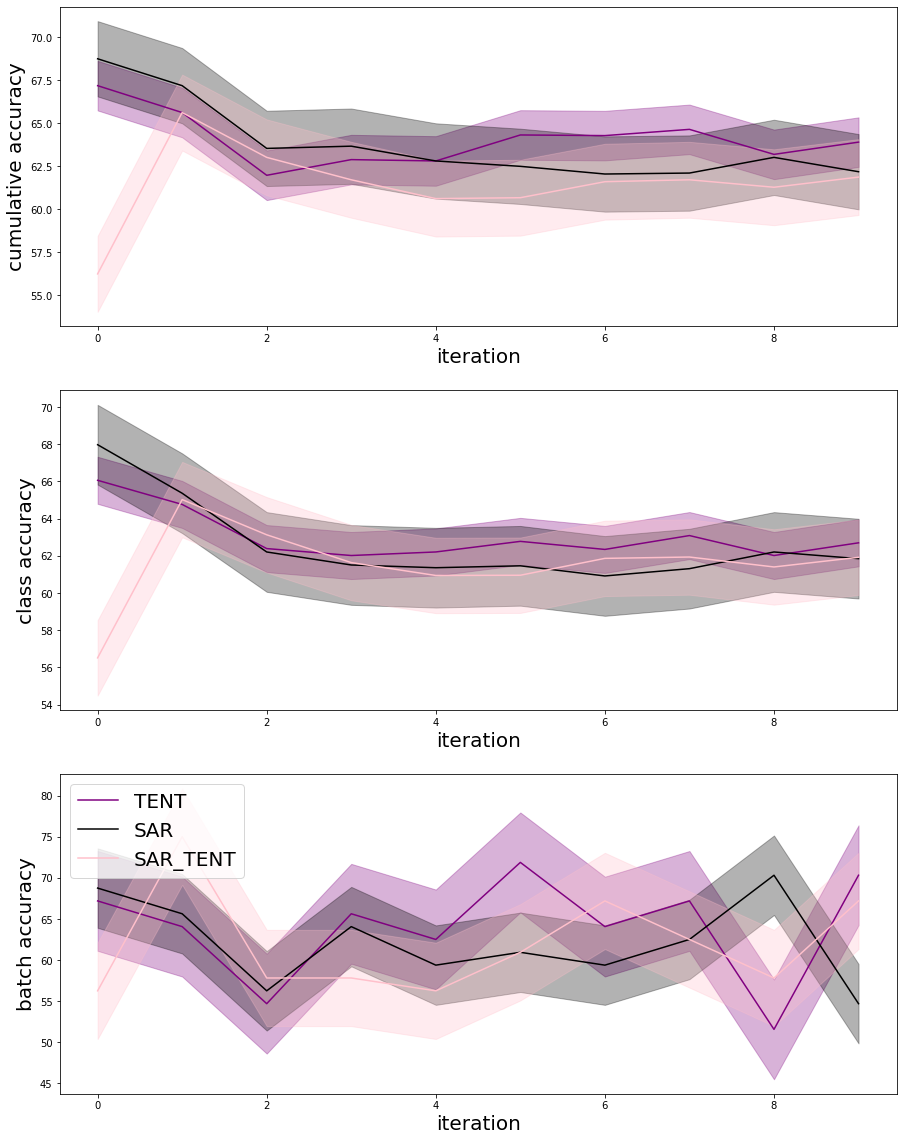

In [54]:
fig,axes=plt.subplots(3,1,figsize=(15,20))
for i,metric in enumerate(["cumulative","class","batch"]):
    for method in methods:
        avg_p=ag[f"{method}_{metric}_accuracy"][0]
        std_p=ag[f"{method}_{metric}_accuracy"][0].std()
        axes[i].plot(avg_p,color=colors[method],label=method)
        axes[i].fill_between(list(range(10)),avg_p-std_p,avg_p+std_p,alpha=0.3,color=colors[method])
        axes[i].set_ylabel(metric+" accuracy",fontsize=20)
        
    axes[i].set_xlabel("iteration",fontsize=20)
plt.legend(fontsize=20)
# plt.savefig("model2.png",dpi=300)